In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

In [24]:
datos= {'ingresos' : [9136.81, 11709.94, 12416.79, 4875.73, 10065.03,
                       11755.33, 7401.78, 10291.38, 12002.42, 11787.76,
                       13347.65, 7676.76, 9808.56, 11556.47, 7875.49,
                       12486.19, 9242.40, 6867.09, 12946.25, 9167.36],
        'horas_trabajadas' : [40.38, 41.55, 41.91, 40.18, 41.69,
                              42.32, 41.57, 41.26, 42.01, 41.46,
                              41.71, 41.36, 40.82, 41.22, 41.11,
                              41.07, 41.20, 40.61, 41.52, 41.26]}


In [25]:
df= pd.DataFrame(datos)
df

,ingresos,horas_trabajadas
0,9136.81,40.38
1,11709.94,41.55
2,12416.79,41.91
3,4875.73,40.18
4,10065.03,41.69
5,11755.33,42.32
6,7401.78,41.57
7,10291.38,41.26
8,12002.42,42.01
9,11787.76,41.46


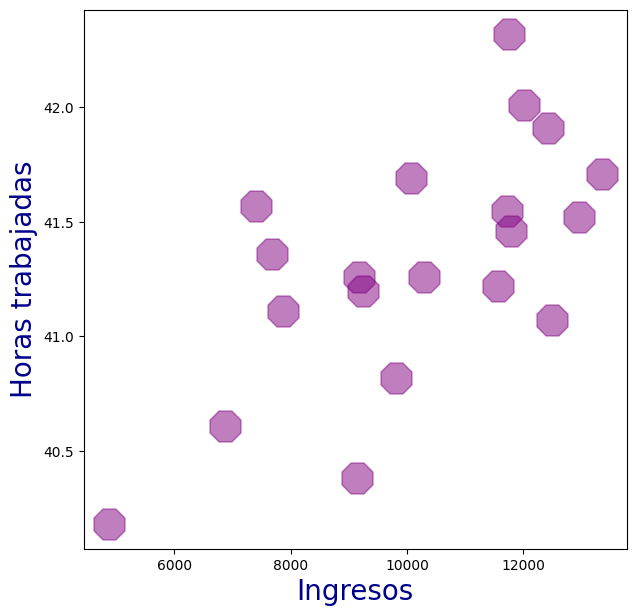

In [26]:
fig= plt.figure(figsize=(7, 7))
plt.scatter(df['ingresos'], df['horas_trabajadas'], marker= '8', s= 580, color= 'purple', alpha= .5)
plt.xlabel('Ingresos', fontsize= 20, color= 'darkblue')
plt.ylabel('Horas trabajadas', fontsize= 20, color= 'darkblue')
plt.show()

Text(0, 0.5, 'Horas trabajadas')

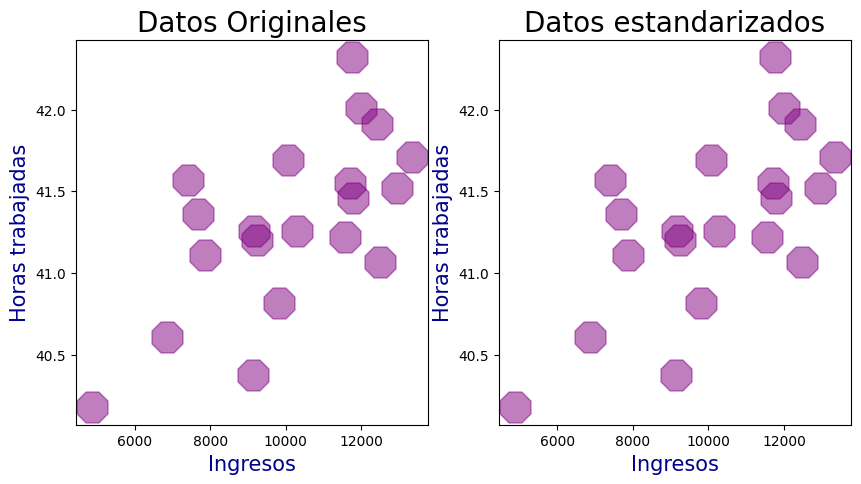

In [32]:
fig= plt.figure(figsize=(10, 5))
ax1= plt.subplot(1,2,1)
ax2= plt.subplot(1,2,2)

ax1.set_title('Datos Originales', fontsize= 20)
ax1.scatter(df['ingresos'], df['horas_trabajadas'], marker= '8', s= 580, color= 'purple', alpha= .5)
ax1.set_xlabel('Ingresos', fontsize= 15, color= 'darkblue')
ax1.set_ylabel('Horas trabajadas', fontsize= 15, color= 'darkblue')

datos = pd.DataFrame(StandardScaler().fit_transform(df), columns=['ingresos', 'horas_trabajadas'])

ax2.set_title('Datos estandarizados', fontsize= 20)
ax2.scatter(df['ingresos'], df['horas_trabajadas'], marker= '8', s= 580, color= 'purple', alpha= .5)
ax2.set_xlabel('Ingresos', fontsize= 15, color= 'darkblue')
ax2.set_ylabel('Horas trabajadas', fontsize= 15, color= 'darkblue')

In [33]:
datos.cov()

,ingresos,horas_trabajadas
ingresos,1.052632,0.682360
horas_trabajadas,0.682360,1.052632


In [39]:
#eigenvalores y eigenvectores
valores, vectores = eig(datos.cov())
valores, vectores 

(array([0.37027172, 1.73499143]),
 array([[-0.70710678, -0.70710678],
        [ 0.70710678, -0.70710678]]))

In [40]:
vector_azul= vectores[:, 0]
vector_rojo= vectores[:, 1]

vector_azul, vector_rojo

(array([-0.70710678,  0.70710678]), array([-0.70710678, -0.70710678]))

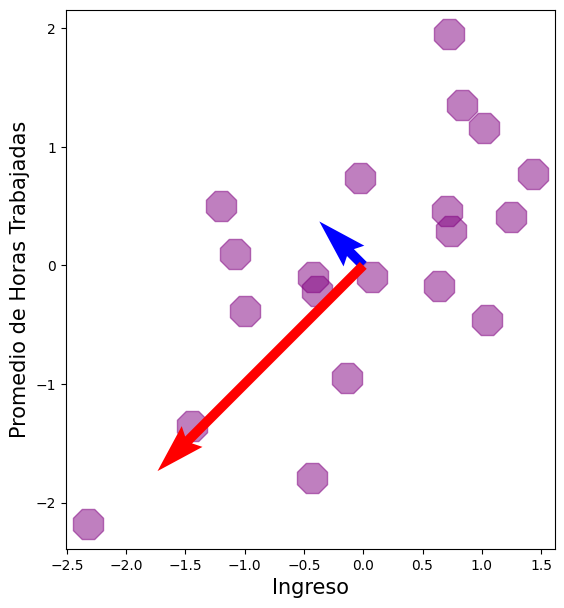

In [43]:
plt.figure(figsize=(7, 7))
plt.axes().set_aspect("equal")

# Graficando los datos
plt.scatter(datos['ingresos'], datos['horas_trabajadas'],
            marker="8", s=550, color="purple", alpha=0.5)

# Graficando los eigenvectores
plt.quiver(0, 0,
           vector_azul[0]/abs(vector_azul[0])*valores[0],
           vector_azul[1]/abs(vector_azul[1])*valores[0],
           color="blue", angles="xy", scale_units="xy", scale=1, width=0.02)

plt.quiver(0, 0,
           vector_rojo[0]/abs(vector_rojo[0])*valores[1],
           vector_rojo[1]/abs(vector_rojo[1])*valores[1],
           color="red", angles="xy", scale_units="xy", scale=1, width=0.02)

plt.xlabel("Ingreso", fontsize=15)
plt.ylabel("Promedio de Horas Trabajadas", fontsize=15)
plt.show()

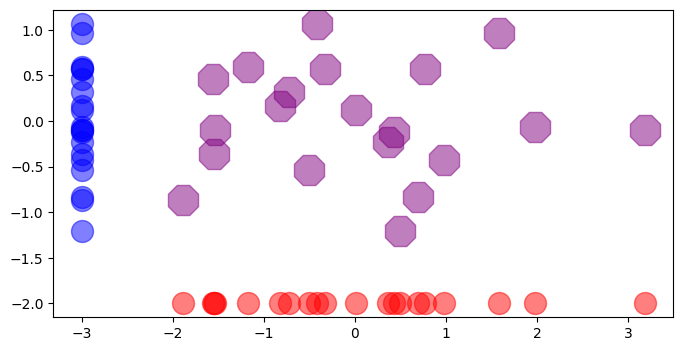

In [44]:
proyectados = pd.DataFrame(datos.values @ vectores.T,
                           columns=["ingreso", "horas_trabajadas"])

# Código de visualización
plt.figure(figsize=(8, 8))
plt.axes().set_aspect("equal")

# Datos rotados
plt.scatter(proyectados["ingreso"], proyectados["horas_trabajadas"],
            marker="8", s=550, color="purple", alpha=0.5)

# Proyección de los datos en 1 dimensión
plt.scatter(proyectados["ingreso"], [-2]*len(proyectados["ingreso"]),
            s=250, color="red", alpha=0.5)

plt.scatter([-3]*len(proyectados["horas_trabajadas"]), proyectados["horas_trabajadas"],
            s=250, color="blue", alpha=0.5)
plt.show()

In [48]:
pca= PCA()
datos= pca.fit_transform(datos)
datos

array([[ 1.57848332, -0.96262064],
       [-0.82428469, -0.17023375],
       [-1.53703633,  0.1001392 ],
       [ 3.18496175,  0.09767747],
       [-0.50071827,  0.5356589 ],
       [-1.88988537,  0.86695982],
       [ 0.49652697,  1.20519594],
       [ 0.01559555, -0.12231499],
       [-1.54391566,  0.36635002],
       [-0.72574575, -0.31747596],
       [-1.5552333 , -0.46423811],
       [ 0.69722418,  0.83240381],
       [ 0.7674792 , -0.57202805],
       [-0.32566169, -0.57280828],
       [ 0.97639977,  0.428854  ],
       [-0.41177447, -1.06855631],
       [ 0.42577215,  0.12400752],
       [ 1.97467634,  0.06167975],
       [-1.17019051, -0.59806662],
       [ 0.36732682,  0.22941629]])

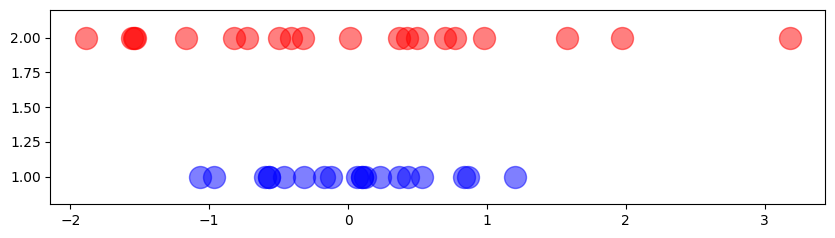

In [53]:
plt.figure(figsize=(10, 10))
plt.axes().set_aspect("equal")

# Graficar los datos proyectados
plt.scatter(datos[:, 0], [2]*datos[:, 0].size, s=250, color="red", alpha=0.5)
plt.scatter(datos[:, 1], [1]*datos[:, 1].size, s=250, color="blue", alpha=0.5)
plt.ylim((0.8, 2.2))
plt.show()

In [54]:
# Información sobre la varianza explicada por cada componente
print("Varianza explicada por cada componente:", pca.explained_variance_)
print("Proporción de varianza explicada por cada componente:", pca.explained_variance_ratio_)

Varianza explicada por cada componente: [1.73499143 0.37027172]
Proporción de varianza explicada por cada componente: [0.82412093 0.17587907]
